# cadCAD Experiment

In [1]:
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (28, 6, 1, 7)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
should_make_claims={}
should_make_claims={}
should_make_claims={0: False}
should_make_claims={0: False, 1: False}
should_make_claims={0: False, 1: False, 2: False}
should_make_claims={0: False, 1: False, 2: False, 3: False}
should_make_claims={0: False, 1: False, 2: False, 3: False}
should_make_claims={0: True, 1: False, 2: False, 3: False}
should_make_claims={0: False, 1: False, 2: False, 3: False}
should_make_claims={0: False, 1: False, 2: False, 3: False, 4: False}
should_make_claims={0: False, 1: False, 2: False, 3: False, 4:

<AxesSubplot:>

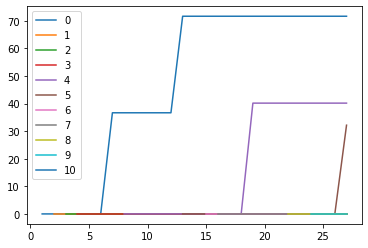

In [40]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        
    timestep += 1

df_plot = pd.DataFrame(broker_holdings)
df_plot.plot()
